<a href="https://colab.research.google.com/github/rshaikh95/datasci_6_regression/blob/main/MultipleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("rms")
install.packages("lmtest")

# Load libraries
library(ggplot2)
library(lmtest) # homogeneity of variances of the residuals, Breusch-Pagan test
library(rms) # Harvey-Collier test for testing linearity.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘gridExtra’, ‘viridis’, ‘Formula’, ‘MatrixModels’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘checkmate’, ‘htmlwidgets’, ‘Hmisc’, ‘quantreg’, ‘SparseM’, ‘polspline’, ‘multcomp’, ‘htmlTable’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘rms’


The following object is masked from ‘package:lmtest’:

    lrtest




In [3]:
data <- read.csv('/content/healthcare-dataset-stroke-data.csv')
data

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59,0,0,Yes,Private,Rural,76.15,27.8,tried smoking once,1


Dependent Variable: Average glucose levels (avg_glucose_level)

Independent Variable: bmi, age, stroke, heart disease

In [4]:
# Fit the regression model
model <- lm(avg_glucose_level ~ bmi + age + stroke + heart_disease, data)
summary(model)


Call:
lm(formula = avg_glucose_level ~ bmi + age + stroke + heart_disease, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-92.66 -28.45 -11.87  14.00 161.44 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   72.18975    2.39751  30.110  < 2e-16 ***
bmi            0.64141    0.08352   7.680 1.90e-14 ***
age            0.31295    0.03019  10.366  < 2e-16 ***
stroke        15.86293    2.91932   5.434 5.77e-08 ***
heart_disease 21.33597    2.79546   7.632 2.73e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.39 on 5105 degrees of freedom
Multiple R-squared:  0.08254,	Adjusted R-squared:  0.08182 
F-statistic: 114.8 on 4 and 5105 DF,  p-value: < 2.2e-16


Based on the adjusted r square value, this model isnt that predictable.

When we come to the individual variables we see that:
Bmi has a positive effect on avrage glucse level, one unit increase in bmi increases the avg blood glucose level by 0.64 unit which is statistically significant as the p-value is less than 0.05.

With every unit increase of age, the avg glucose level increase by 0.31 units which is again a positive effect and significant as per the p-value.

Stroke also has a positive effect and is statistically significant with a p-value of 5.77e-08. There is a 15.86 unit increase in avg gucose level with just 1 unit increase in stroke.

Heart Disease has a major effect on avg glucose level which is 21.33 units. It is evidently positive and significant.

In [5]:
# Calculate residuals and fitted values
residuals <- model$residuals
fitted <- model$fitted.values


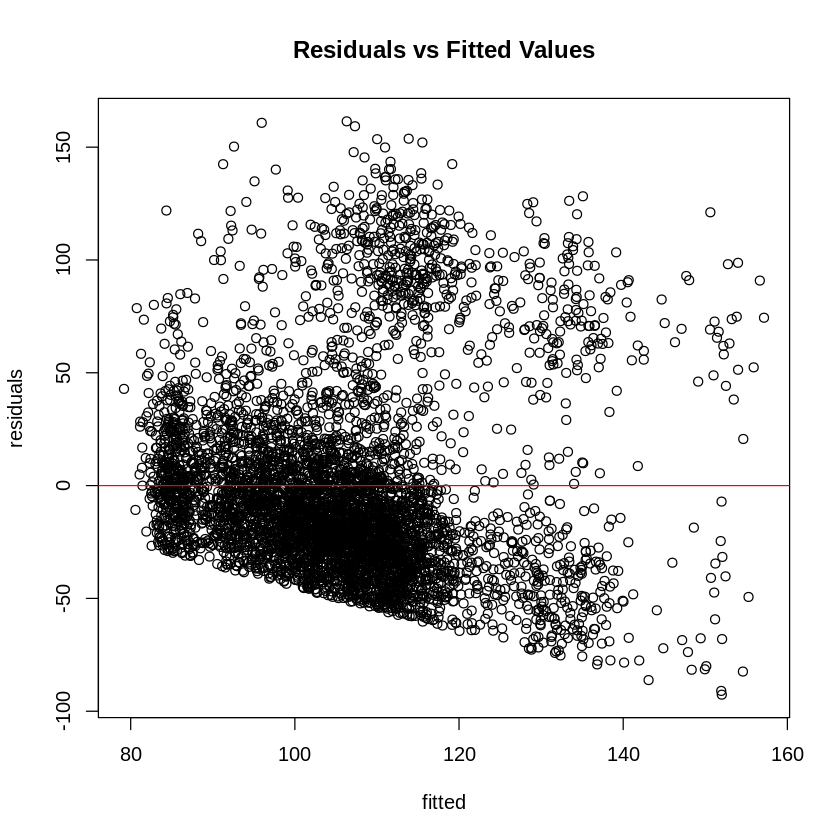

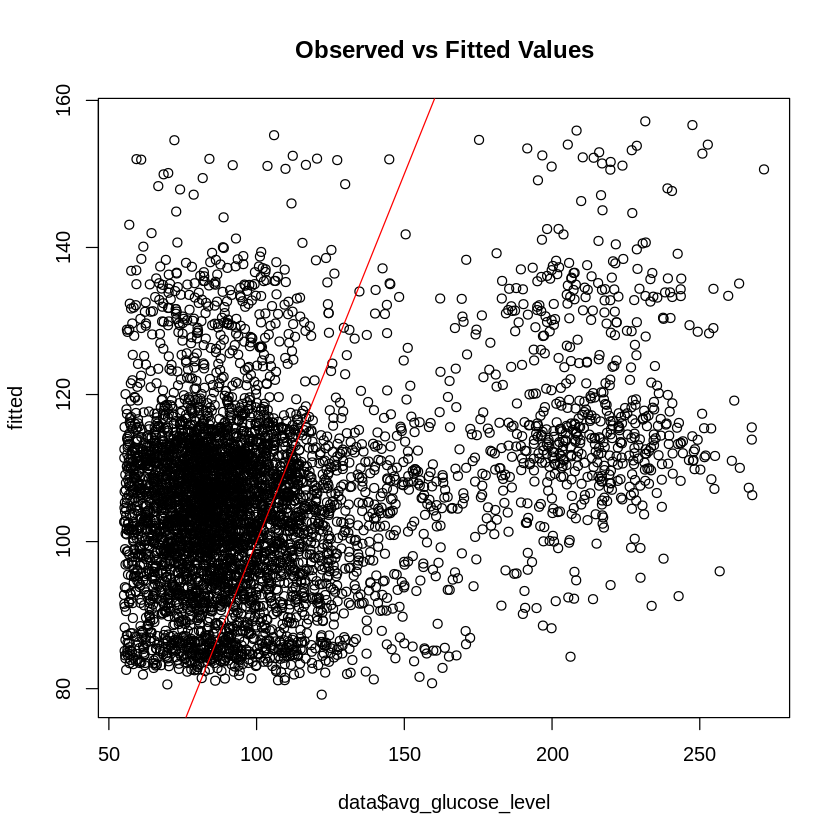

In [6]:
# CHECKING ASSUMPTIONS

# Assessing linearity of the relationship
plot(fitted, residuals)
abline(h = 0, col = "red")
title("Residuals vs Fitted Values")
plot(data$avg_glucose_level, fitted)
abline(0, 1, col = "red")
title("Observed vs Fitted Values")

In [7]:
# Harvey-Collier test for linearity
hc_test <- harvtest(model)
print(hc_test)


Warning message in sqrt(fr):
“NaNs produced”
Warning message in sqrt(fr):
“NaNs produced”



	Harvey-Collier test

data:  model
HC = NA, df = 5104, p-value = NA




	Shapiro-Wilk normality test

data:  residuals[0:5000]
W = 0.88381, p-value < 2.2e-16


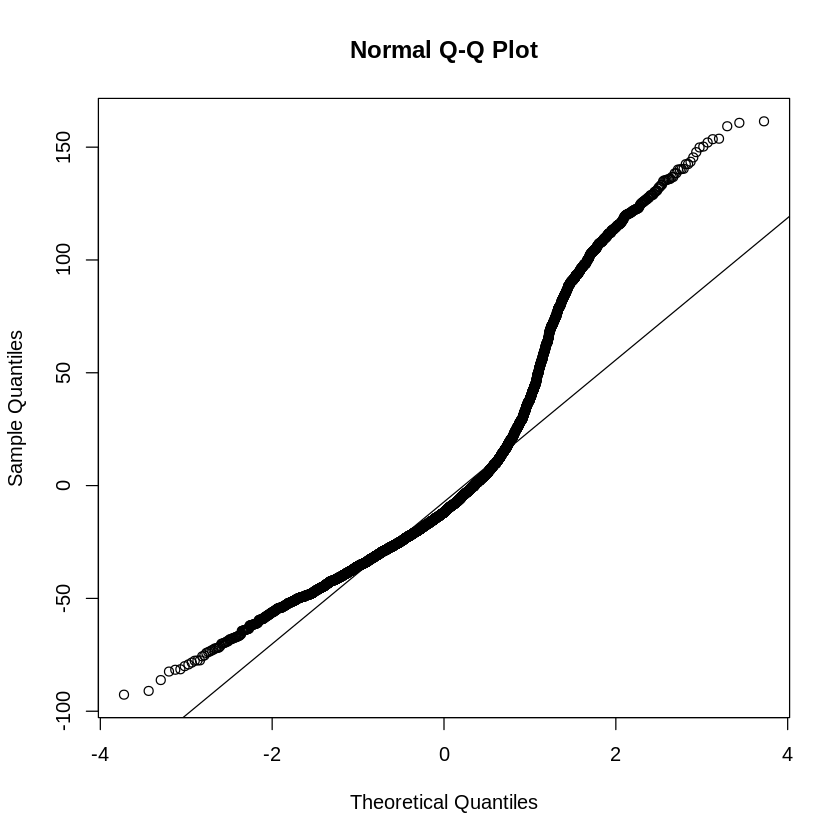

In [8]:
# Assessing normality of residuals
shapiro.test(residuals[0:5000])
qqnorm(residuals)
qqline(residuals)


The above test failed. The p value shows that the residuals are not normally distributed.

In [9]:
# Assessing homogeneity of variance of residuals
bp_test <- bptest(model)
print(bp_test)


	studentized Breusch-Pagan test

data:  model
BP = 491.98, df = 4, p-value < 2.2e-16



This test is as well has failed. The assumption of homogenity is not met.